In [1]:
# WIP

In [213]:
# Standard imports
import pandas as pd
import numpy as np
from zipfile import ZipFile

# Plotting 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from bokeh.plotting import figure, output_notebook, show, output_file
import seaborn as sns

output_notebook()
%matplotlib inline

# Housekeeping
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

# Colour management
MC = '#242a49'  # Main
SC = '#ededed'  # Secondary
TC = 'red'  # Tertiary (:

colors = [MC, '#17b5ff', 'navy', 'red', 'pink']
cmap = mcolors.LinearSegmentedColormap.from_list('n', ['red', 'white', MC])

plt.rcParams.update({
    'font.family': 'monospace',
    'font.size': 10,
    'figure.figsize': (12, 6),
    'grid.color': SC,
    'axes.titlesize': 16.0,
    'axes.facecolor': 'none',
    'axes.formatter.useoffset': False,  # Scientific notation
})


Loading BokehJS ...

In [214]:
df = pd.read_csv(ZipFile('data/used-cars-database.zip').open('autos.csv'),
                encoding='Latin1', parse_dates=['dateCrawled', 'dateCreated', 'lastSeen'])
df.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46


In [215]:
df.columns

new_columns = ['DateCrawled', 'Name', 'Seller', 'OfferType', 'Price', 'ABTest',
              'VehicleType', 'Year', 'Gearbox', 'PowerPS',
              'Model', 'KM', 'Month', 'FuelType', 'Brand',
              'Damage', 'DateCreated', 'Pictures', 'PostalCode',
              'LastSeen']
df.columns = new_columns
df.head()

,DateCrawled,Name,Seller,OfferType,Price,ABTest,VehicleType,Year,Gearbox,PowerPS,Model,KM,Month,FuelType,Brand,Damage,DateCreated,Pictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
DateCrawled    371528 non-null datetime64[ns]
Name           371528 non-null object
Seller         371528 non-null object
OfferType      371528 non-null object
Price          371528 non-null int64
ABTest         371528 non-null object
VehicleType    333659 non-null object
Year           371528 non-null int64
Gearbox        351319 non-null object
PowerPS        371528 non-null int64
Model          351044 non-null object
KM             371528 non-null int64
Month          371528 non-null int64
FuelType       338142 non-null object
Brand          371528 non-null object
Damage         299468 non-null object
DateCreated    371528 non-null datetime64[ns]
Pictures       371528 non-null int64
PostalCode     371528 non-null int64
LastSeen       371528 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(7), object(10)
memory usage: 56.7+ MB


In [217]:
df.describe()

,Price,Year,PowerPS,KM,Month,Pictures,PostalCode
count,"371,528.00","371,528.00","371,528.00","371,528.00","371,528.00","371,528.00","371,528.00"
mean,"17,295.14","2,004.58",115.55,"125,618.69",5.73,0.00,"50,820.67"
std,"3,587,953.74",92.87,192.14,"40,112.34",3.71,0.00,"25,799.08"
min,0.00,"1,000.00",0.00,"5,000.00",0.00,0.00,"1,067.00"
25%,"1,150.00","1,999.00",70.00,"125,000.00",3.00,0.00,"30,459.00"
50%,"2,950.00","2,003.00",105.00,"150,000.00",6.00,0.00,"49,610.00"
75%,"7,200.00","2,008.00",150.00,"150,000.00",9.00,0.00,"71,546.00"
max,"2,147,483,647.00","9,999.00","20,000.00","150,000.00",12.00,0.00,"99,998.00"


In [218]:
df.describe(include=['object']).T

,count,unique,top,freq
Name,371528,233531,Ford_Fiesta,657
Seller,371528,2,privat,371525
OfferType,371528,2,Angebot,371516
ABTest,371528,2,test,192585
VehicleType,333659,8,limousine,95894
Gearbox,351319,2,manuell,274214
Model,351044,251,golf,30070
FuelType,338142,7,benzin,223857
Brand,371528,40,volkswagen,79640
Damage,299468,2,nein,263182


In [219]:
df.isnull().sum()

DateCrawled        0
Name               0
Seller             0
OfferType          0
Price              0
ABTest             0
VehicleType    37869
Year               0
Gearbox        20209
PowerPS            0
Model          20484
KM                 0
Month              0
FuelType       33386
Brand              0
Damage         72060
DateCreated        0
Pictures           0
PostalCode         0
LastSeen           0
dtype: int64

In [220]:
df.drop(['Name', 'ABTest', 'Pictures', 'Seller', 'OfferType'], axis=1, inplace=True)

'Andere' means 'other' in german. So it's nan value.

In [221]:
df.replace('andere', np.nan, inplace=True)
df.Price.replace(0, np.nan, inplace=True)
df.Price[(df.Price > 80000000) | (df.Price < 100)] = np.nan
df.PowerPS[(df.PowerPS < 25) | (df.PowerPS > 500)] = np.nan

In [222]:
# df.Year = pd.to_datetime(df.Year).dt.year
# There are 13 months so it looks like 0 suppoesed to be nan
# df.Month = pd.to_datetime(df.Month.replace(0, np.nan).dropna().astype(int), format='%m').dt.month

In [223]:
df.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'Year', 'Gearbox', 'PowerPS',
       'Model', 'KM', 'Month', 'FuelType', 'Brand', 'Damage', 'DateCreated',
       'PostalCode', 'LastSeen'],
      dtype='object')

# 1. Variable identification
Type of Variable:
    Predictor Variable: Name, VehicleType, Year, Gearbox, PowerPs, Model, KM, Month, FuelType,
                        Brand, NotRepairedDemage
                        
    Target Variable: Price
    
Data Type:

    Datetype: Year, Month, DateCrawled, DateCreated, LastSeen
    String: Name, VehicleType, Gearbox, Model, FuelType, Brand, NotRepairedDemage, PostalCode
    Number: Price, PowerPS, KM
    
Variable Category:

    Categorical: Name, VehicleType, Year, Gearbox, Model, FuelType,
                        Brand, NotRepairedDemage
                        
    Continuous: Price, PowerPS, KM

# 2. Univariate Analysis

### Continuous Variables - Central Tendency
Mean, Median, Mode, Min, Max

In [13]:
df[['Price', 'PowerPS', 'KM']].describe().T

,count,mean,std,min,25%,50%,75%,max
Price,"358,191.00","7,479.46","178,589.99",100.00,"1,290.00","3,100.00","7,500.00","74,185,296.00"
PowerPS,"329,336.00",125.43,59.86,25.00,80.00,116.00,150.00,500.00
KM,"371,528.00","125,618.69","40,112.34","5,000.00","125,000.00","150,000.00","150,000.00","150,000.00"


In [14]:
print('Mode')
for col in ['Price', 'PowerPS', 'KM']:
    print('{}: {}'.format(col, df[col].mode().values[0]))

Mode
Price: 500.0
PowerPS: 75.0
KM: 150000


### Continuous Variables - Boxplots and Histograms

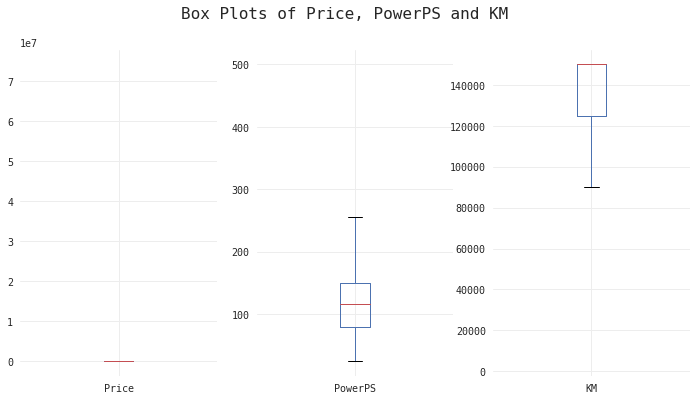

In [15]:
plt.suptitle('Box Plots of Price, PowerPS and KM', fontsize=16)
plt.subplot(1, 3, 1)
df.Price.dropna().plot(kind='box');
plt.subplot(1, 3, 2)
df.PowerPS.dropna().plot(kind='box');
plt.subplot(1, 3, 3)
df.KM.dropna().plot(kind='box');

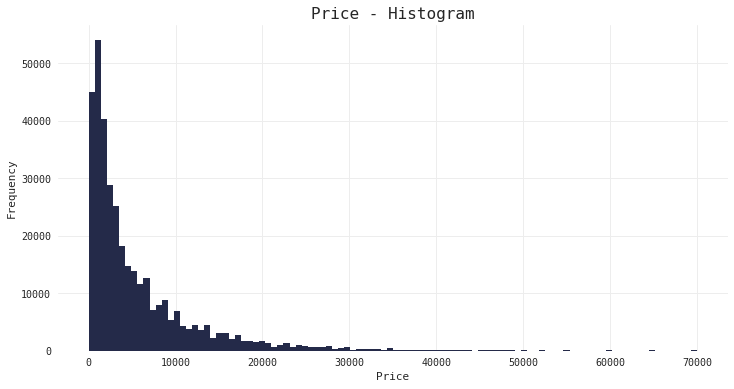

In [16]:
plt.hist(df.Price.dropna(), range=[10, 70000], bins=100, color=MC);
plt.title('Price - Histogram');
plt.xlabel('Price')
plt.ylabel('Frequency');

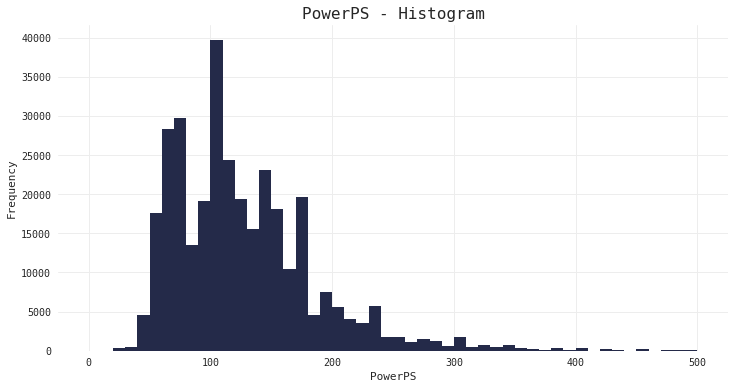

In [17]:
plt.hist(df.PowerPS.dropna(), range=[0,500], bins=50, color=MC);
plt.title('PowerPS - Histogram');
plt.xlabel('PowerPS')
plt.ylabel('Frequency');

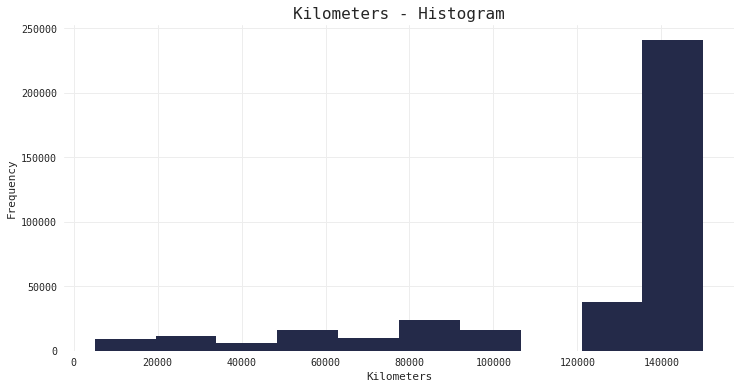

In [18]:
plt.hist(df.KM, color=MC);
plt.title('Kilometers - Histogram');
plt.xlabel('Kilometers')
plt.ylabel('Frequency');

### Categorical Variables 

In [19]:
df.describe(include=['object']).T

,count,unique,top,freq
VehicleType,330302,7,limousine,95894
Gearbox,351319,2,manuell,274214
Model,324644,250,golf,30070
FuelType,337934,6,benzin,223857
Brand,371528,40,volkswagen,79640
Demage,299468,2,nein,263182


For categorical variables, we’ll use frequency table to understand distribution of each category.

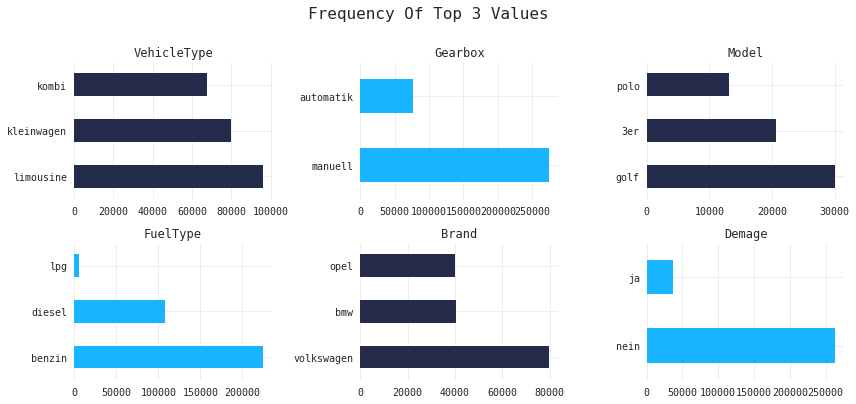

In [20]:
# Checking for top frequnet values
top_range = 3
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
plt.figure(figsize=(12, 20))
plt.suptitle('Frequency Of Top {} Values'.format(top_range), y=1.02, fontsize=16)
for i, col in enumerate(categorical_cols):
    plt.subplot(8, 3, i+1)
    plt.title(col, fontsize=12)
    df[col].value_counts()[:top_range].plot(kind='barh', color=[colors[0] if i%2 == 0 else colors[1]]);
    plt.tight_layout()

In [21]:
df.FuelType.value_counts()

benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        278
elektro       104
Name: FuelType, dtype: int64

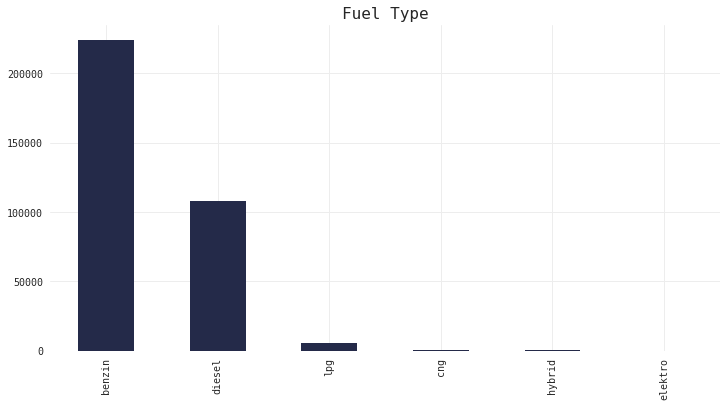

In [22]:
df.FuelType.value_counts().plot(kind='bar', color=MC)
plt.title('Fuel Type');

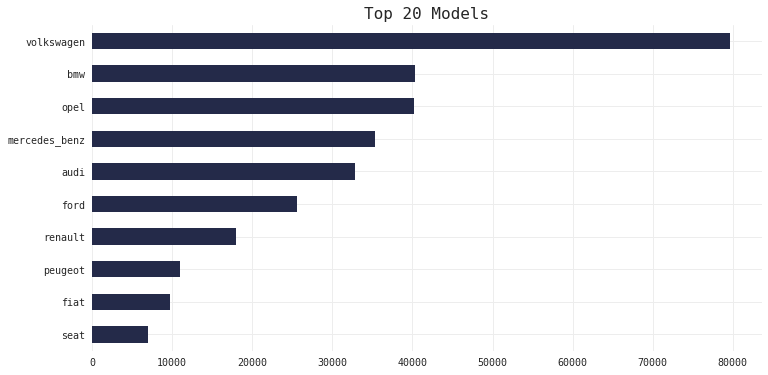

In [23]:
# plt.figure(figsize=(12, 10))
df.Brand.value_counts()[:10].sort_values(ascending=True).plot('barh', color=MC);
plt.title('Top 20 Models');

# 3. Bi-variate Analysis

### Continuous & Continuous

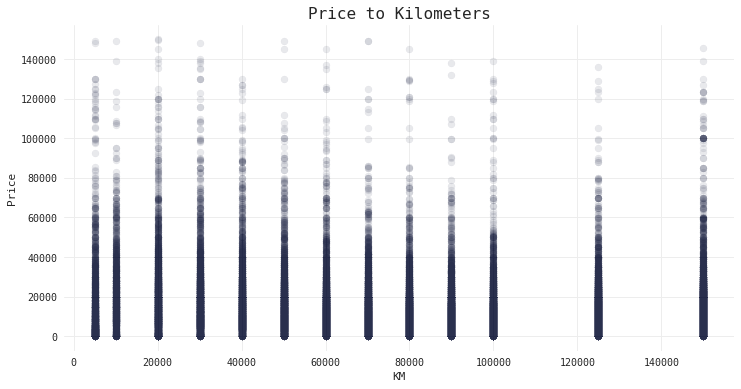

In [24]:
km_price_df = df[['KM', 'Price']][df.Price < 150000]
plt.scatter(km_price_df.KM, km_price_df.Price, color=MC, alpha=.1)
plt.xlabel('KM');
plt.ylabel('Price');
plt.title('Price to Kilometers');

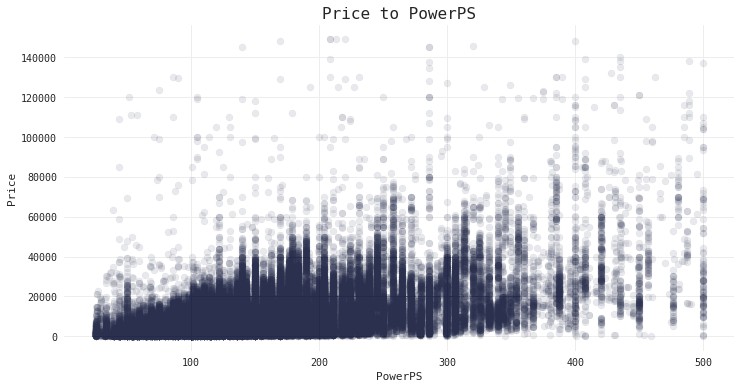

In [25]:
power_price_df = df[['PowerPS', 'Price']][df.Price < 150000]
plt.scatter(power_price_df.PowerPS, power_price_df.Price, color=MC, alpha=.1)
plt.xlabel('PowerPS');
plt.ylabel('Price');
plt.title('Price to PowerPS');

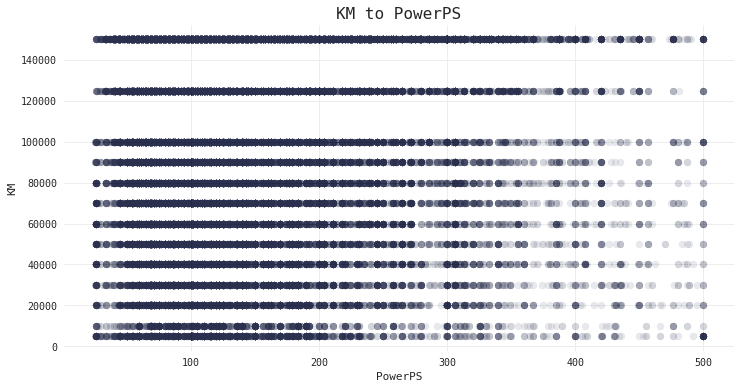

In [26]:
power_km_df = df[['KM', 'PowerPS']]
plt.scatter(power_km_df.PowerPS, power_km_df.KM, color=MC, alpha=.1)
plt.xlabel('PowerPS');
plt.ylabel('KM');
plt.title('KM to PowerPS');

#### Correlations

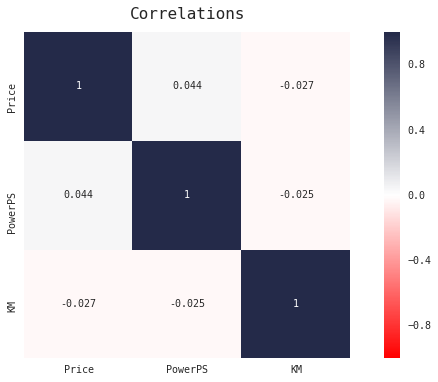

In [27]:
sns.heatmap(df[['Price', 'PowerPS', 'KM']].corr(), cmap=cmap, square=True, annot=True)
plt.title('Correlations', y=1.02);

### Categorical & Categorical

Name, VehicleType, Gearbox, Model, FuelType,
                    Brand, NotRepairedDemage

In [28]:
top_10_brands = df.Brand.value_counts()[:10].index
top_20_models = df.Model.value_counts()[:20].index

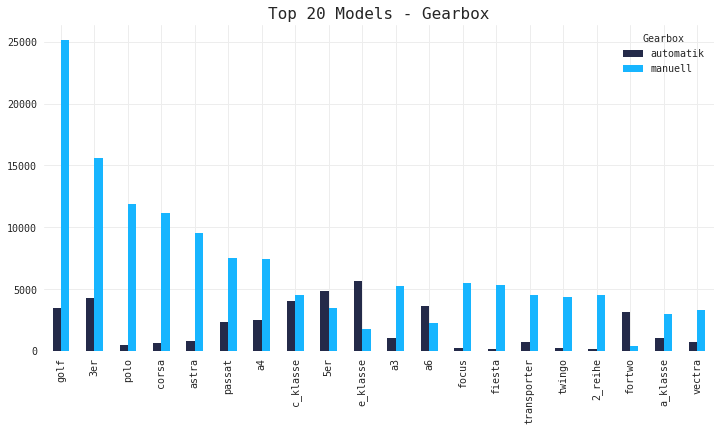

In [29]:
# Two-way table
pd.crosstab(df.Model, df.Gearbox, ).loc[top_20_models, :].plot(kind='bar', color=colors)
plt.title('Top 20 Models - Gearbox')

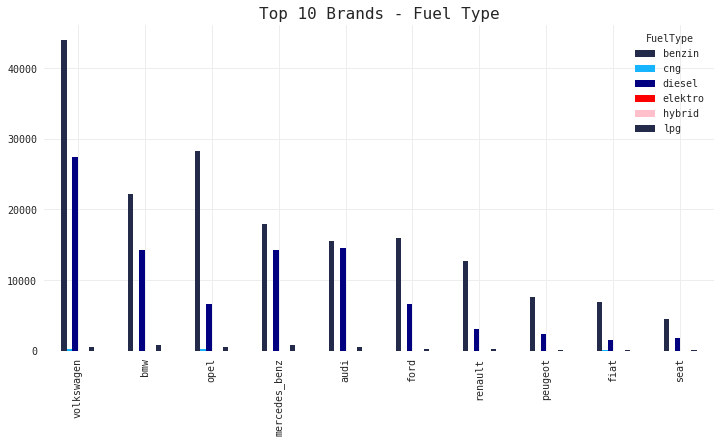

In [30]:
pd.crosstab(df.Brand, df.FuelType).loc[top_10_brands, :] \
    .plot(kind='bar', color=colors)
plt.title('Top 10 Brands - Fuel Type');

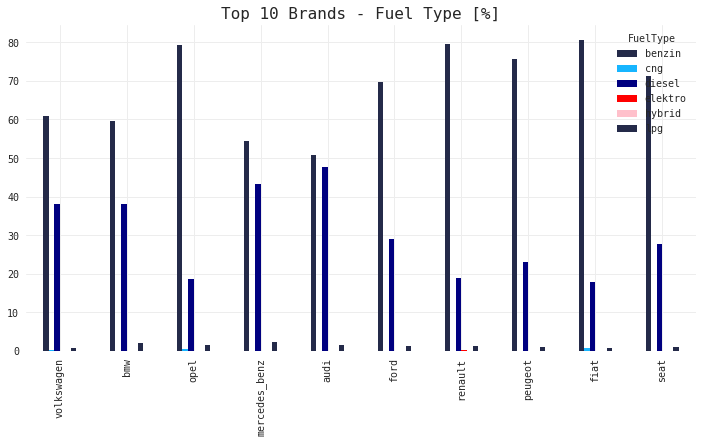

In [31]:
pd.crosstab(df.Brand, df.FuelType).apply(lambda x: x/x.sum() *100, axis=1).loc[top_10_brands, :] \
    .plot(kind='bar', color=colors)
plt.title('Top 10 Brands - Fuel Type [%]');

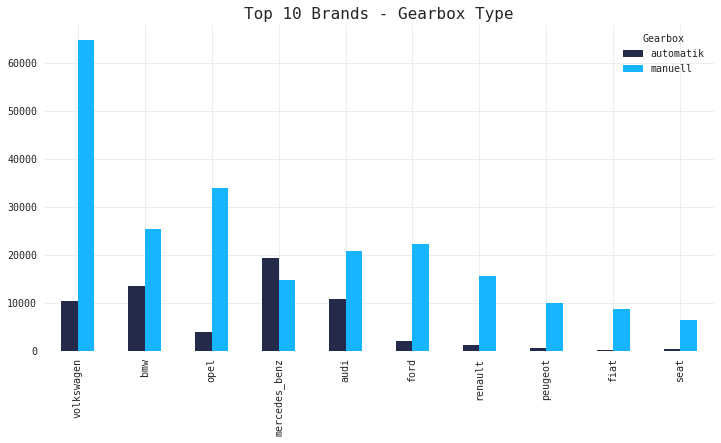

In [32]:
pd.crosstab(df.Brand, df.Gearbox).loc[top_10_brands, :] \
    .plot(kind='bar', color=colors)
plt.title('Top 10 Brands - Gearbox Type');

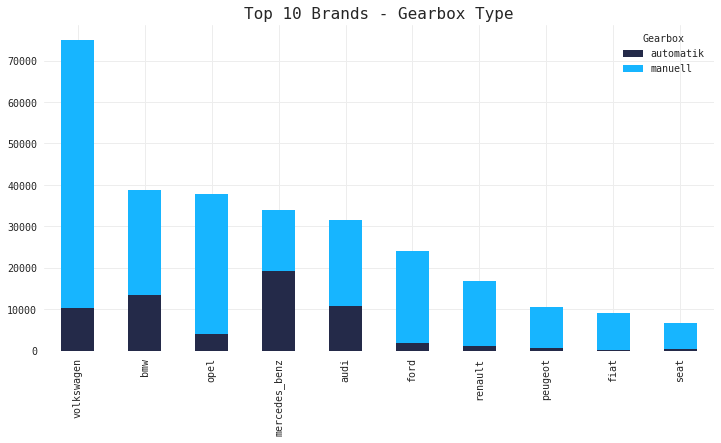

In [33]:
pd.crosstab(df.Brand, df.Gearbox).loc[top_10_brands, :] \
    .plot(kind='bar', color=colors, stacked=True)
plt.title('Top 10 Brands - Gearbox Type');

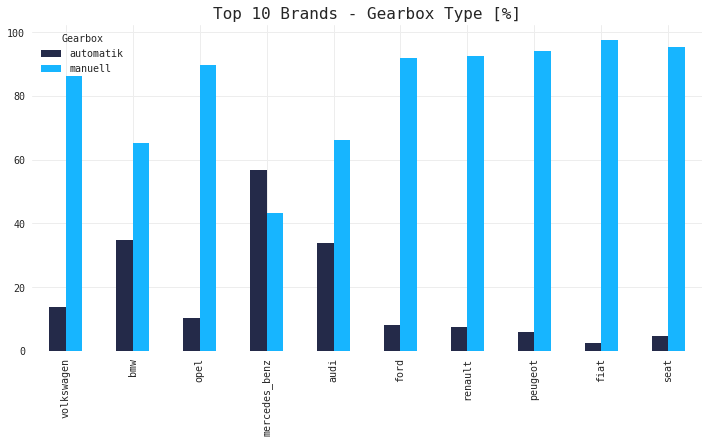

In [34]:
pd.crosstab(df.Brand, df.Gearbox).apply(lambda x: x/x.sum() * 100, axis=1) \
    .loc[top_10_brands, :] \
    .plot(kind='bar', color=colors)
plt.title('Top 10 Brands - Gearbox Type [%]');

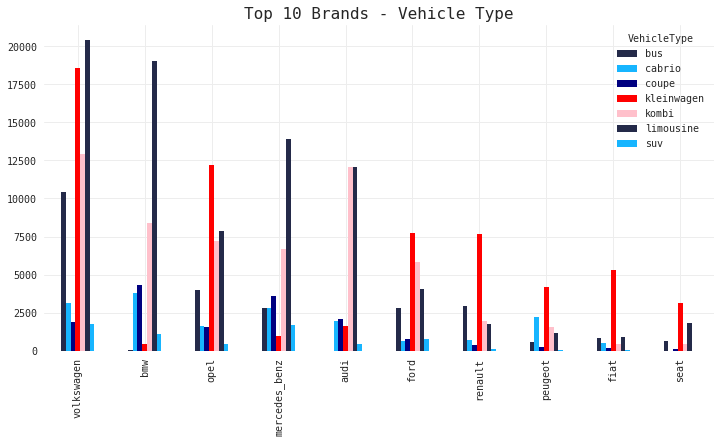

In [35]:
pd.crosstab(df.Brand, df.VehicleType).loc[top_10_brands, :] \
    .plot(kind='bar', color=colors)
plt.title('Top 10 Brands - Vehicle Type');

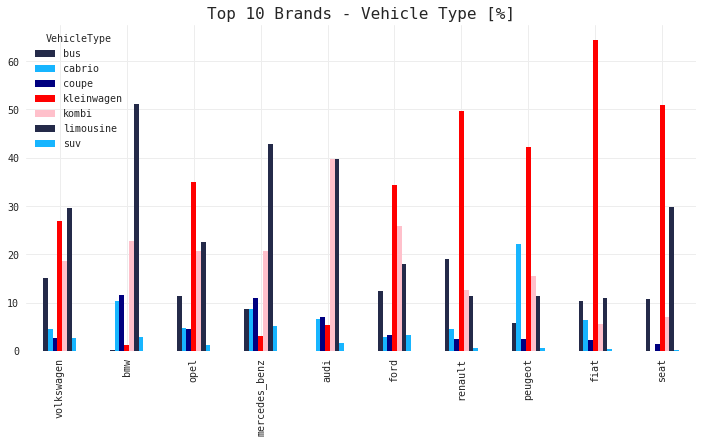

In [36]:
pd.crosstab(df.Brand, df.VehicleType) \
    .apply(lambda x: x/x.sum() * 100, axis=1) \
    .loc[top_10_brands, :] \
    .plot(kind='bar', color=colors)
plt.title('Top 10 Brands - Vehicle Type [%]');

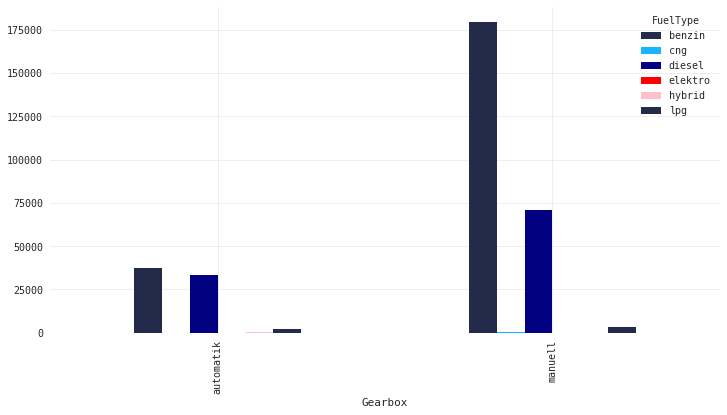

In [37]:
pd.crosstab(df.Gearbox, df.FuelType).plot(kind='bar', color=colors);

In [38]:
# Chi-Square Test

### Categorical & Continuous

# 4. Missing Value Treatment

### How many missing values?

In [39]:
df.isnull().sum()

DateCrawled        0
Price          13337
VehicleType    41226
Year               0
Gearbox        20209
PowerPS        42192
Model          46884
KM                 0
Month          37675
FuelType       33594
Brand              0
Demage         72060
DateCreated        0
PostalCode         0
LastSeen           0
dtype: int64

#### Missing values as a percentage

In [40]:
df.isnull().sum() / df.shape[0] * 100

DateCrawled    0.00
Price          3.59
VehicleType   11.10
Year           0.00
Gearbox        5.44
PowerPS       11.36
Model         12.62
KM             0.00
Month         10.14
FuelType       9.04
Brand          0.00
Demage        19.40
DateCreated    0.00
PostalCode     0.00
LastSeen       0.00
dtype: float64

In [41]:
# Shows rows that include missing values.
df[df.isnull().T.any().T][:10]

,DateCrawled,Price,VehicleType,Year,Gearbox,PowerPS,Model,KM,Month,FuelType,Brand,Demage,DateCreated,PostalCode,LastSeen
0,2016-03-24 11:52:17,480.00,NaN,1970,manuell,nan,golf,150000,nan,benzin,volkswagen,NaN,2016-03-24,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,"18,300.00",coupe,1970,manuell,190.00,NaN,125000,5.00,diesel,audi,ja,2016-03-24,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"9,800.00",suv,1970,automatik,163.00,grand,125000,8.00,diesel,jeep,NaN,2016-03-14,90480,2016-04-05 12:47:46
7,2016-03-21 18:54:38,nan,limousine,1970,manuell,50.00,NaN,40000,7.00,benzin,volkswagen,nein,2016-03-21,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,"14,500.00",bus,1970,manuell,125.00,c_max,30000,8.00,benzin,ford,NaN,2016-04-04,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999.00,kleinwagen,1970,manuell,101.00,golf,150000,nan,NaN,volkswagen,NaN,2016-03-17,27472,2016-03-31 17:17:06
12,2016-03-15 22:49:09,999.00,kombi,1970,manuell,115.00,passat,150000,11.00,benzin,volkswagen,NaN,2016-03-15,37269,2016-04-01 13:16:16
13,2016-03-21 21:37:40,"2,500.00",kombi,1970,manuell,131.00,passat,150000,2.00,NaN,volkswagen,nein,2016-03-21,90762,2016-03-23 02:50:54
15,2016-03-11 21:39:15,450.00,kleinwagen,1970,NaN,nan,ka,5000,nan,benzin,ford,NaN,2016-03-11,24148,2016-03-19 08:46:47
16,2016-04-01 12:46:46,300.00,NaN,1970,NaN,60.00,polo,150000,nan,benzin,volkswagen,NaN,2016-04-01,38871,2016-04-01 12:46:46


In [42]:
df.isnull().sum()

DateCrawled        0
Price          13337
VehicleType    41226
Year               0
Gearbox        20209
PowerPS        42192
Model          46884
KM                 0
Month          37675
FuelType       33594
Brand              0
Demage         72060
DateCreated        0
PostalCode         0
LastSeen           0
dtype: int64

In [47]:
model_power_dict = dict(df.groupby('Model')['PowerPS'].mean())

def clean_power(row):
    if pd.isnull(row.PowerPS):
        try:
            return model_power_dict[row.Model]
        except:
            return np.nan
    else:
        return row.PowerPS
               
df.PowerPS = df.apply(clean_power, axis=1)

In [49]:
df.isnull().sum() / df.shape[0]

DateCrawled   0.00
Price         0.04
VehicleType   0.11
Year          0.00
Gearbox       0.05
PowerPS       0.03
Model         0.13
KM            0.00
Month         0.10
FuelType      0.09
Brand         0.00
Demage        0.19
DateCreated   0.00
PostalCode    0.00
LastSeen      0.00
dtype: float64

In [78]:
# builds dict of model types
model_type_dict = {}

for model in df.Model.unique():
    try:
        model_type_dict[model] = df[df.Model == model].VehicleType.mode().values[0]
    except:
        model_type_dict[model] = np.nan

In [82]:
def clean_type(row):
    if pd.isnull(row.VehicleType):
        try:
            return model_type_dict[row.Model]
        except:
            return np.nan
    else:
        return row.VehicleType
               
df.VehicleType = df.apply(clean_type, axis=1)

In [83]:
df.isnull().sum() / df.shape[0]

DateCrawled   0.00
Price         0.04
VehicleType   0.04
Year          0.00
Gearbox       0.05
PowerPS       0.03
Model         0.13
KM            0.00
Month         0.10
FuelType      0.09
Brand         0.00
Demage        0.19
DateCreated   0.00
PostalCode    0.00
LastSeen      0.00
dtype: float64

# Playground

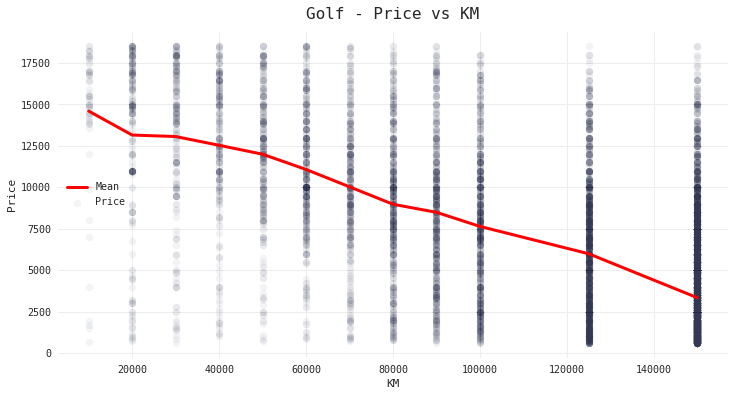

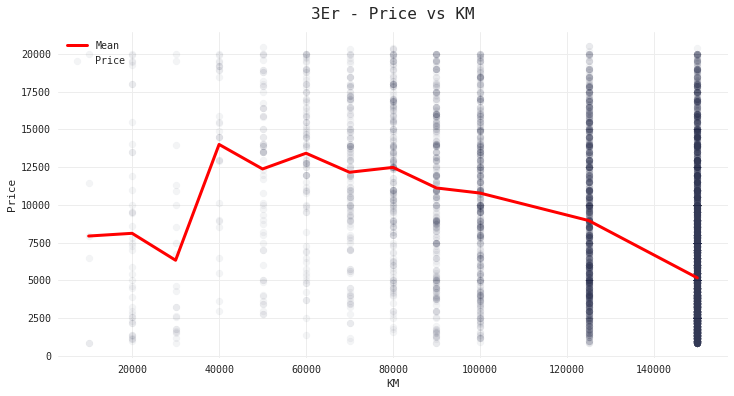

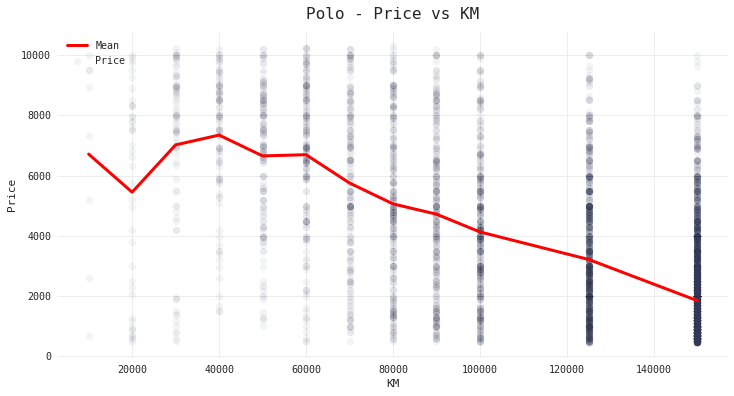

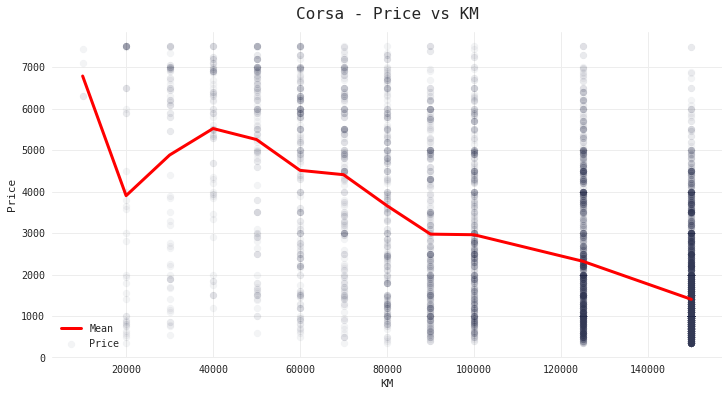

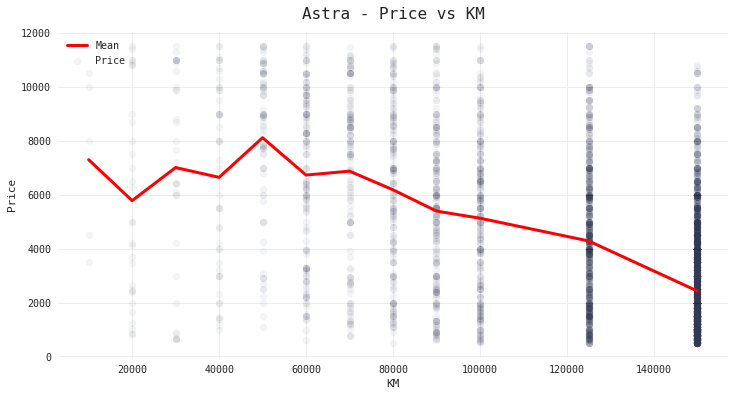

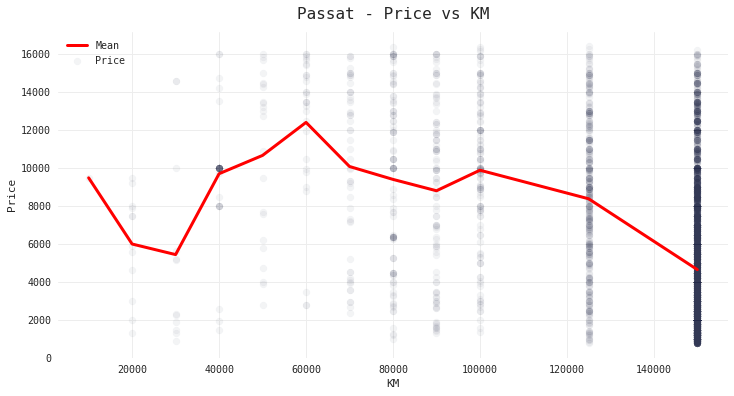

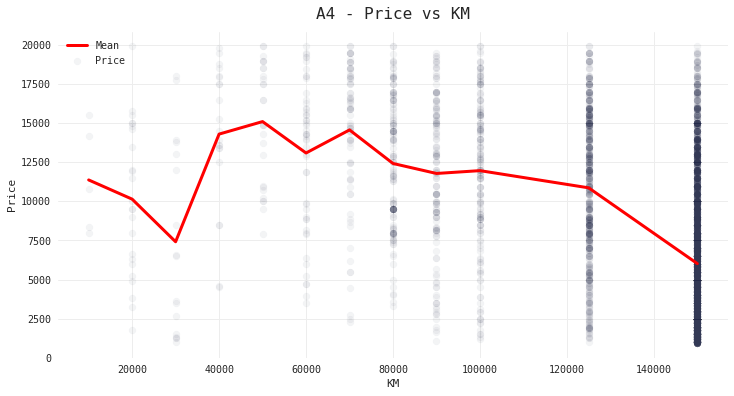

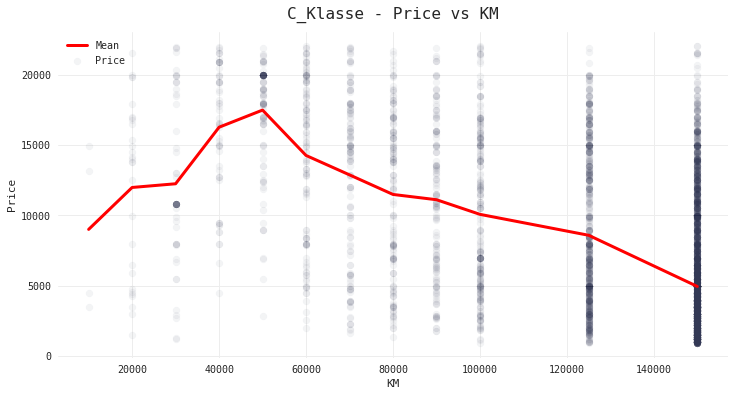

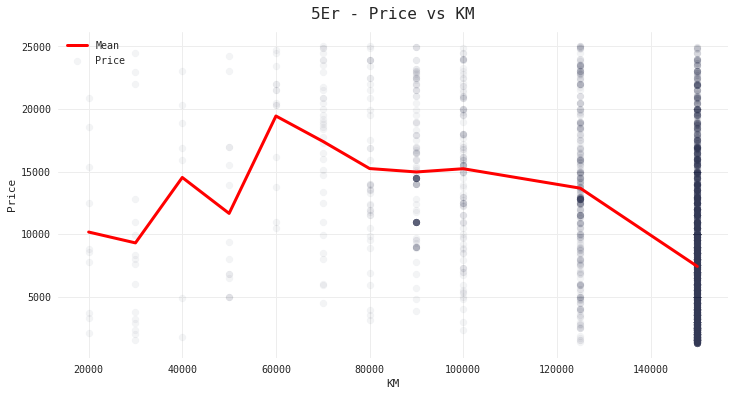

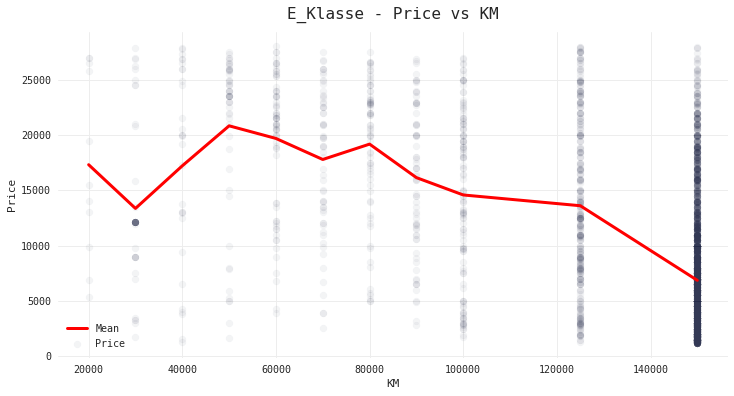

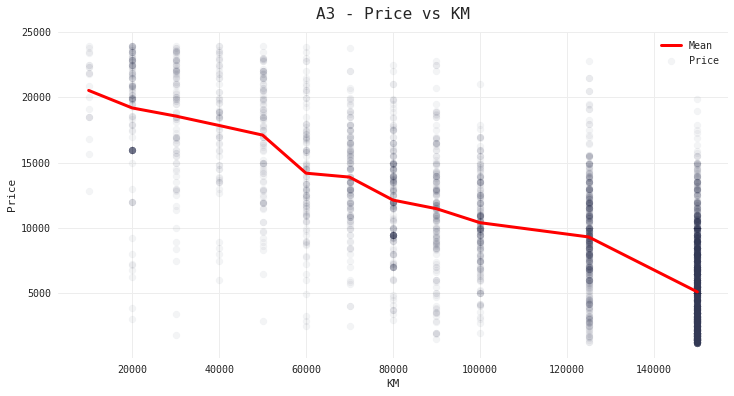

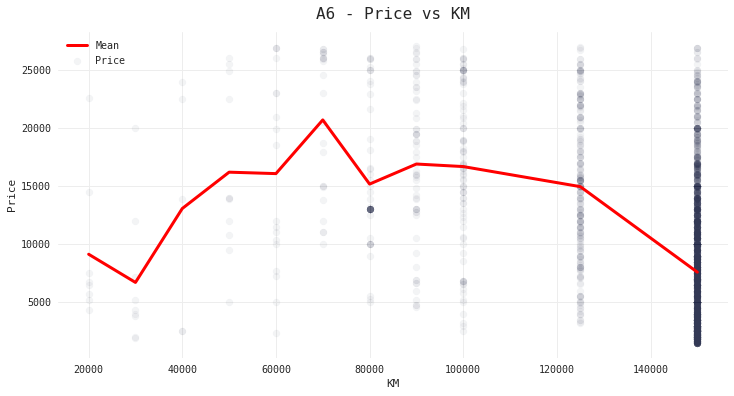

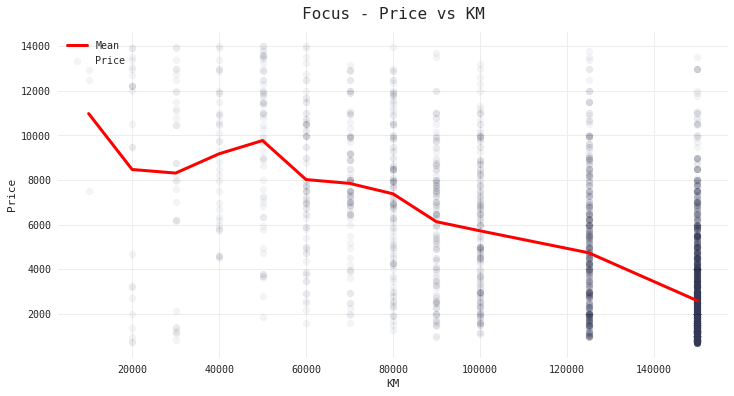

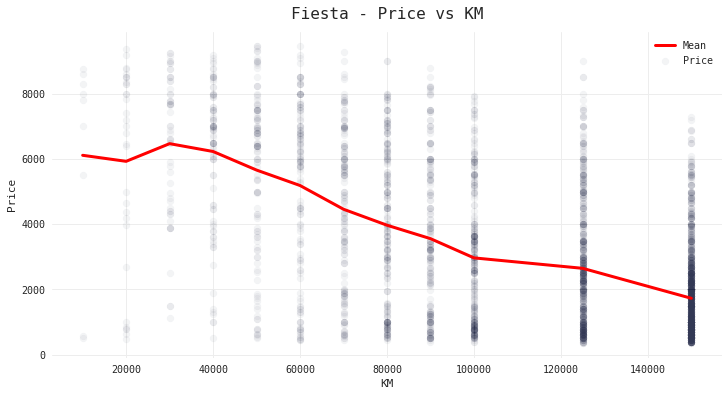

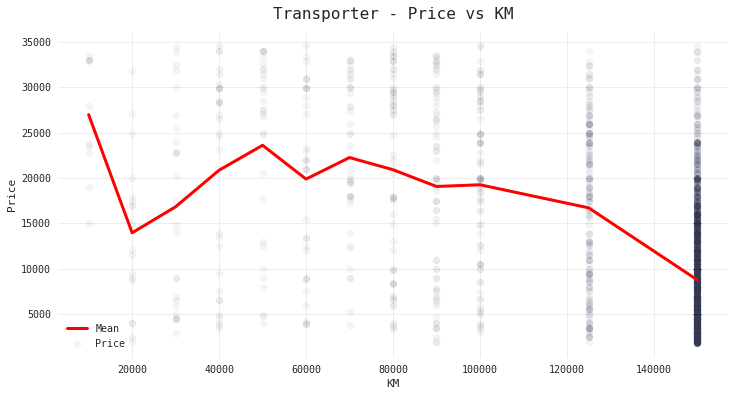

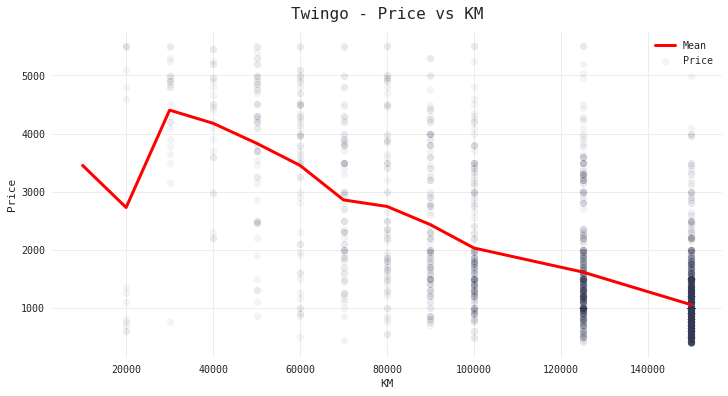

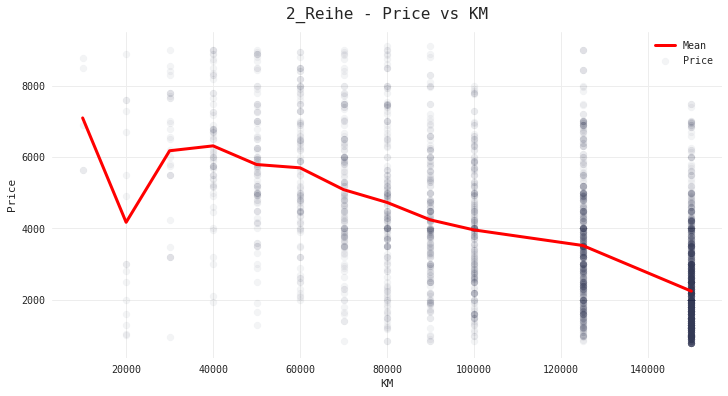

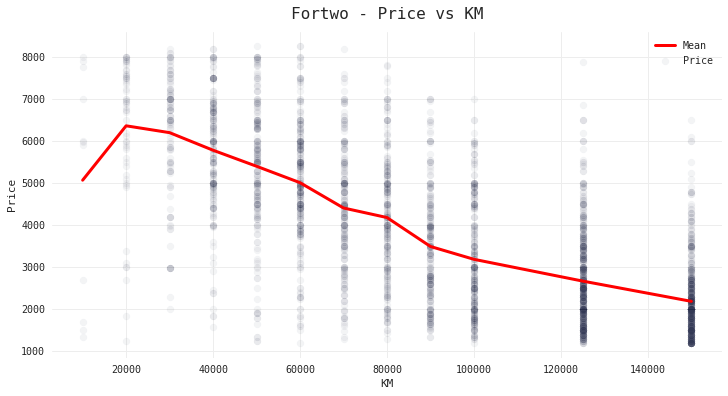

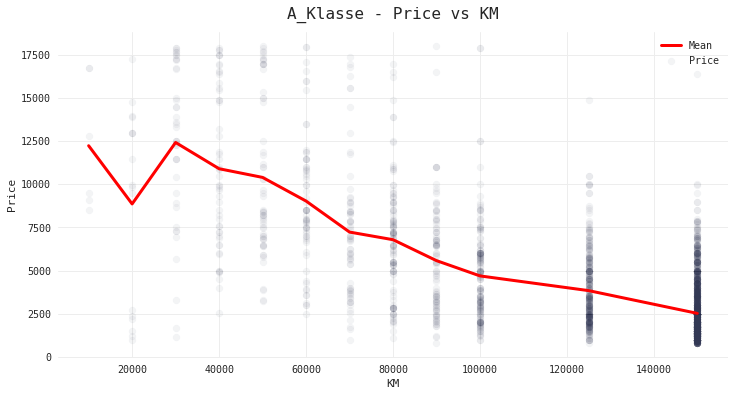

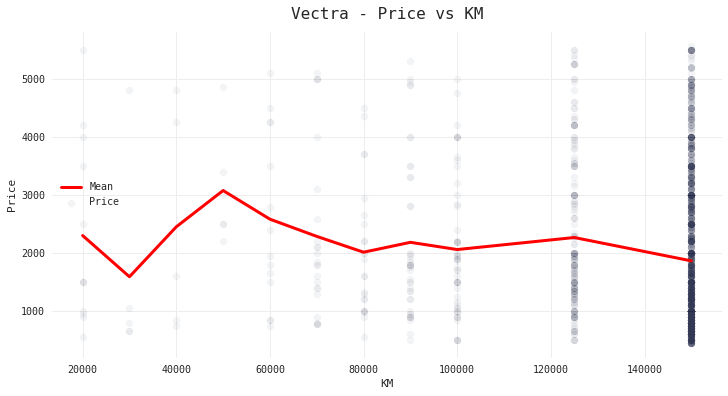

In [226]:
for model in top_20_models:

    temp_df = df[(df.Model == model) & (df.KM > 5000) & (df.Damage == 'nein')]
    # Takes care of price outliers
    p_min = temp_df.Price.quantile(.05)
    p_max = temp_df.Price.quantile(.95)
    temp_df = temp_df[temp_df.Price.between(p_min, p_max)]

    plt.scatter(temp_df.KM, temp_df.Price, color=MC, alpha=.05)
    plt.xlabel('KM')
    plt.ylabel('Price')
    plt.title('{} - Price vs KM'.format(model.title()), y=1.02);
    temp_df.groupby('KM')['Price'].mean().plot(color='red', linewidth=3, label='Mean')
    plt.legend()
    plt.show()

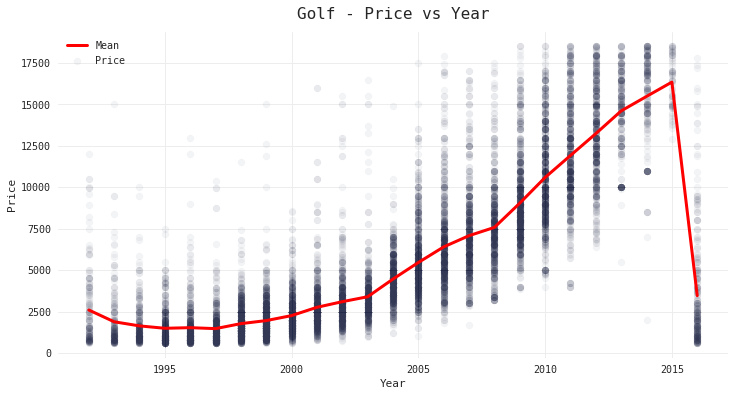

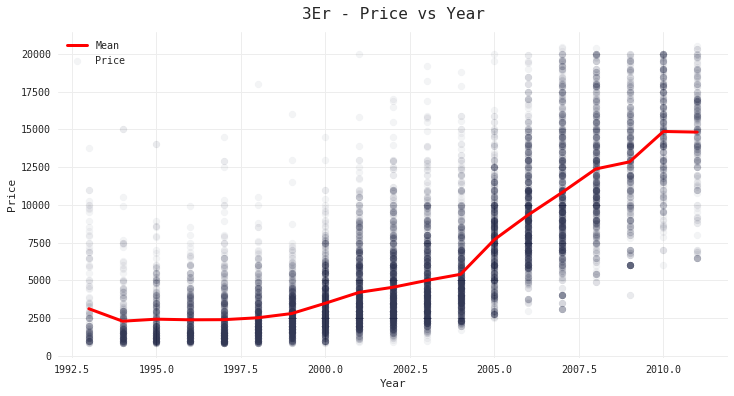

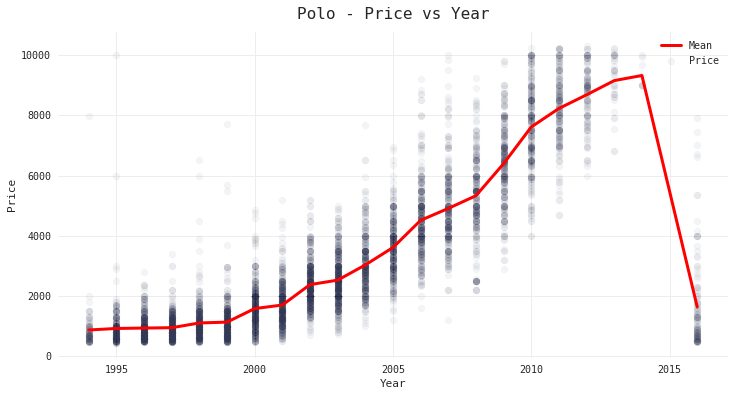

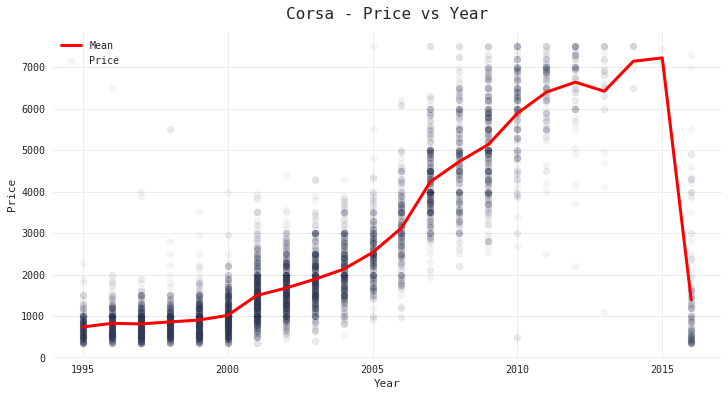

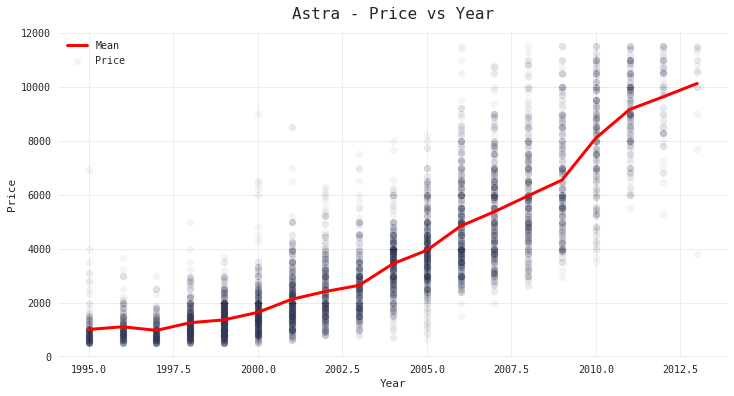

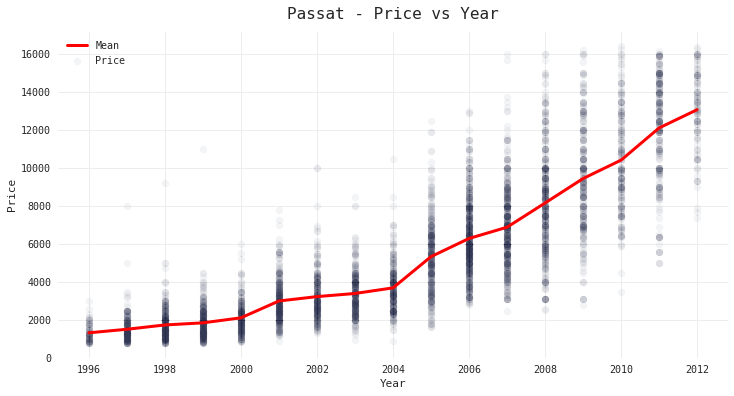

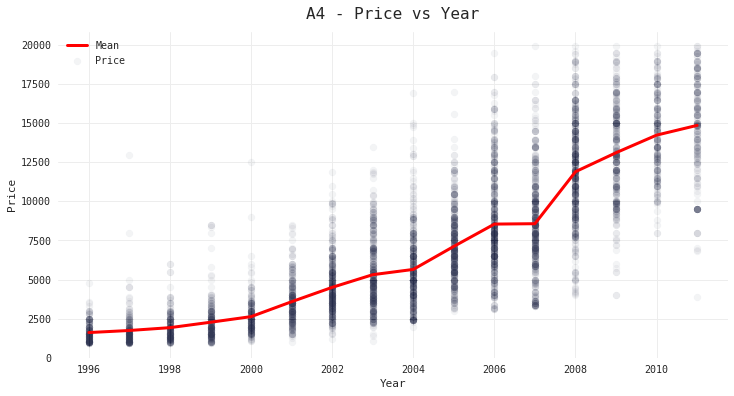

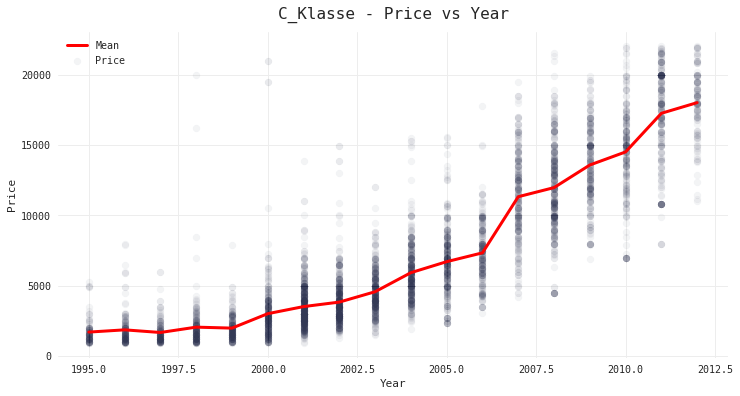

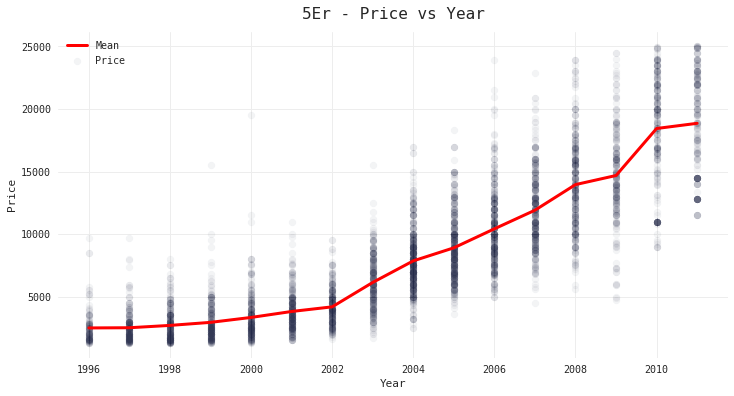

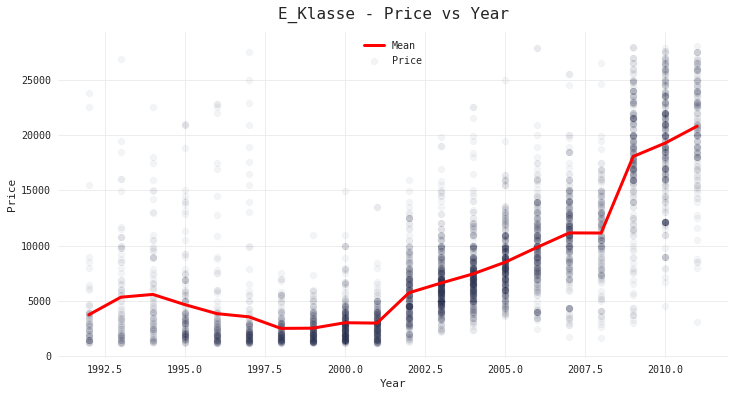

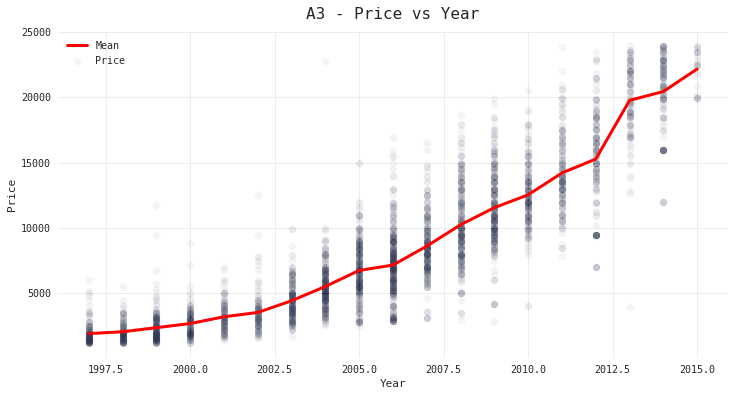

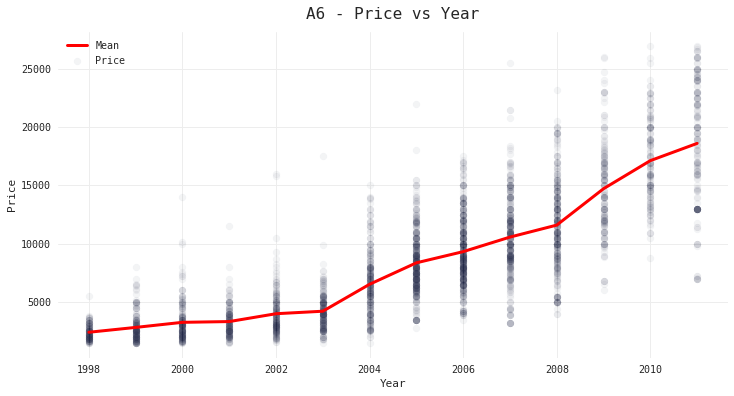

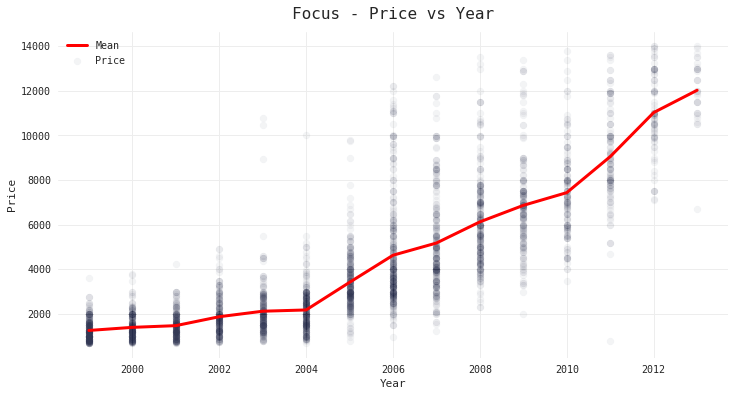

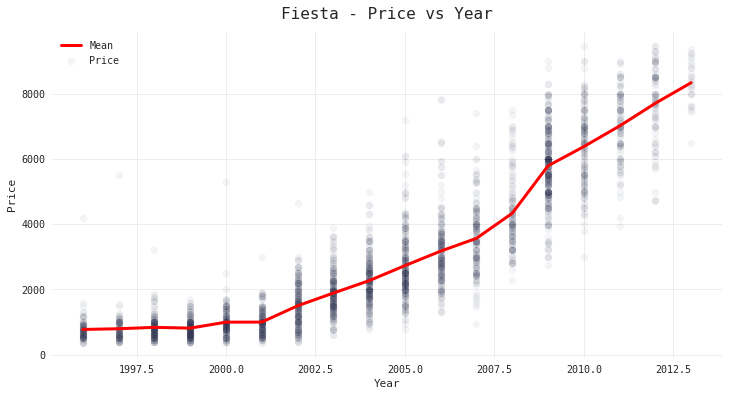

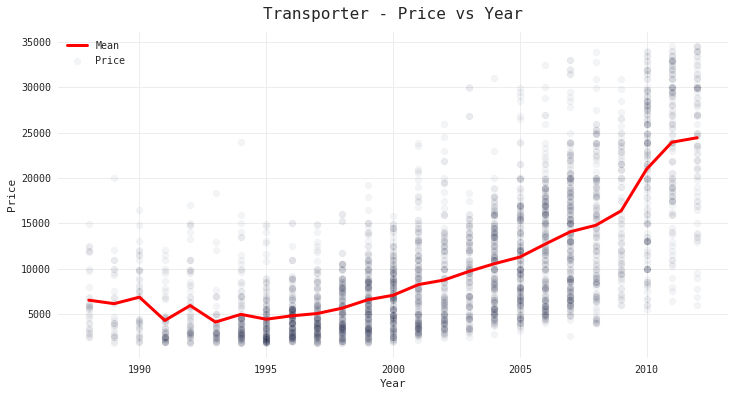

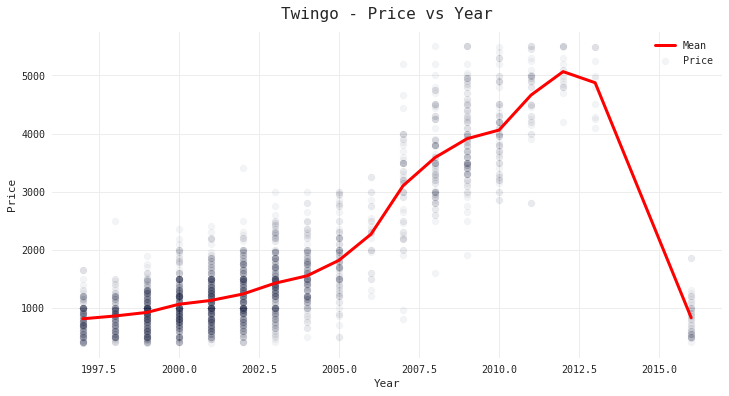

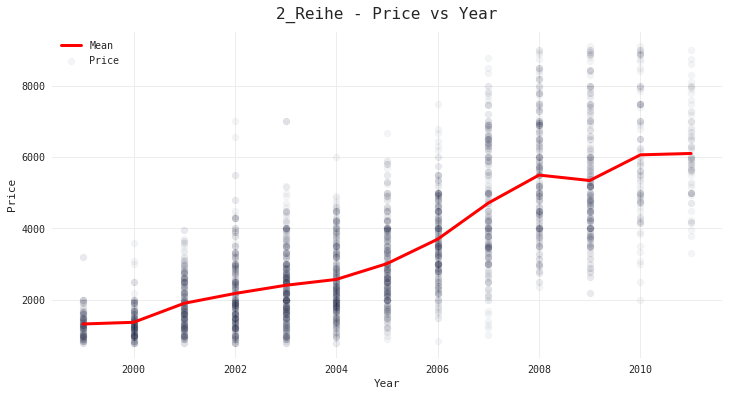

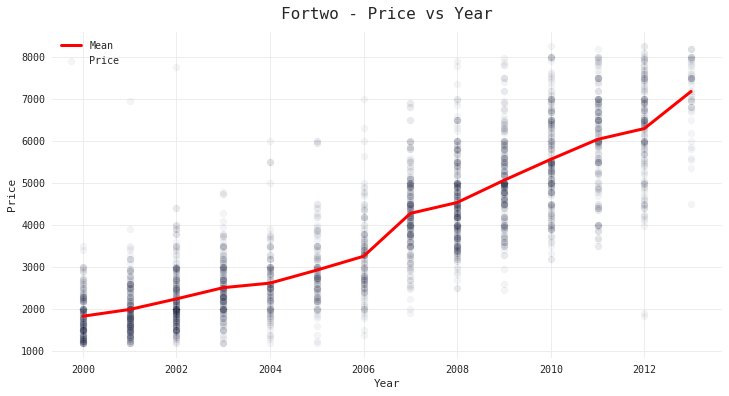

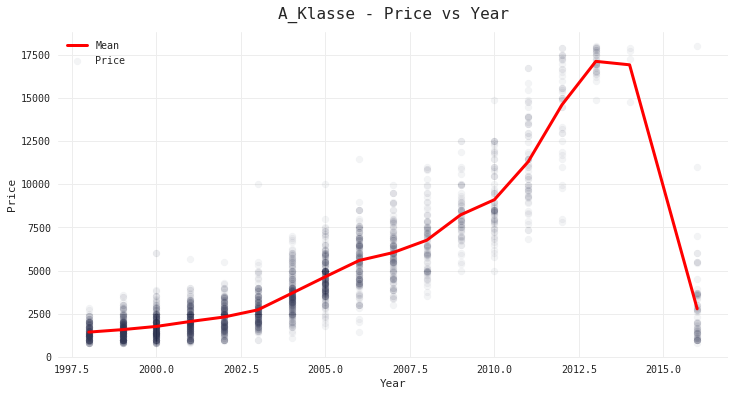

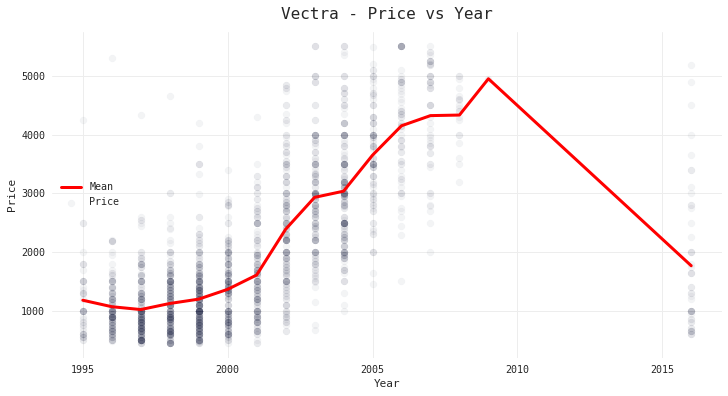

In [227]:
for model in top_20_models:

    temp_df = df[(df.Model == model) & (df.KM > 5000) & (df.Damage == 'nein')]
    # Takes care of price outliers
    p_min = temp_df.Price.quantile(.05)
    p_max = temp_df.Price.quantile(.95)
    temp_df = temp_df[temp_df.Price.between(p_min, p_max)]
    p_min = temp_df.Year.quantile(.05)
    p_max = temp_df.Year.quantile(.95)
    temp_df = temp_df[temp_df.Year.between(p_min, p_max)]

    plt.scatter(temp_df.Year, temp_df.Price, color=MC, alpha=.05)
    plt.xlabel('KM')
    plt.ylabel('Price')
    plt.title('{} - Price vs Year'.format(model.title()), y=1.02);
    temp_df.groupby('Year')['Price'].mean().plot(color='red', linewidth=3, label='Mean')
    plt.legend()
    plt.show()